In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,6)
from sklearn import preprocessing
import seaborn as sns 

%matplotlib inline
train = pd.read_csv('housingtrain.csv')
test = pd.read_csv('housingtest.csv')

In [216]:
traindump = pd.read_csv('housingtrain.csv')
testdump = pd.read_csv('housingtest.csv')

In [217]:
#train.LotFrontage.value_counts()
train = traindump
test = testdump

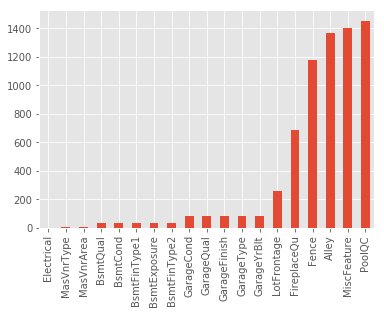

In [218]:
ms = traindump.isnull().sum()
ms = ms[ms > 0]
ms.sort_values(inplace=True)
ms.plot.bar()

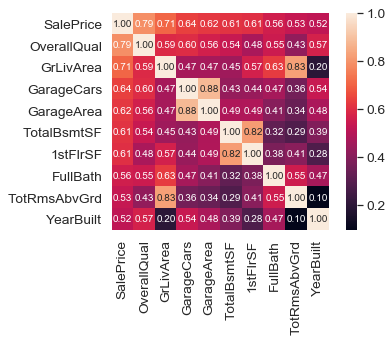

In [221]:
corrmat = traindump.corr()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

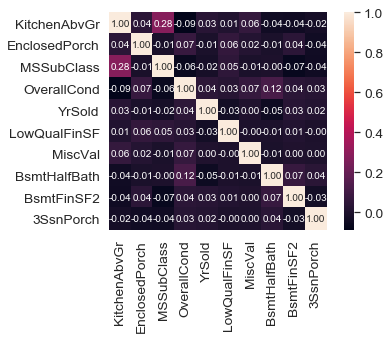

In [226]:
corrmat = traindump.drop('Id',axis =1).corr()
k = 10 #number of variables for heatmap
cols = corrmat.nsmallest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

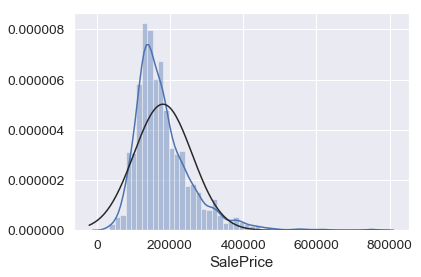

In [238]:
import scipy.stats as st
sns.distplot(train.SalePrice, fit=st.norm)

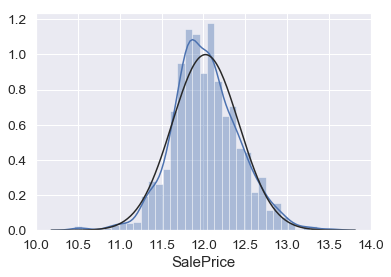

In [239]:
sns.distplot(np.log1p(train.SalePrice), fit=st.norm)

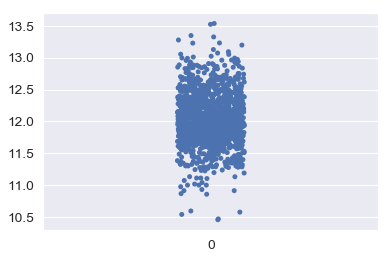

In [228]:
sns.stripplot(data=np.log1p(traindump.SalePrice), jitter=True)

In [230]:
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']
useless = ['Alley', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageQual', 'MiscFeature', 'PoolQC', 'Street', 'Utilities']
qualitativeuseful = [item for item in qualitative if item not in useless]
quantitativeuseful = [item for item in quantitative if item not in useless]

C:\Users\Ghh\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


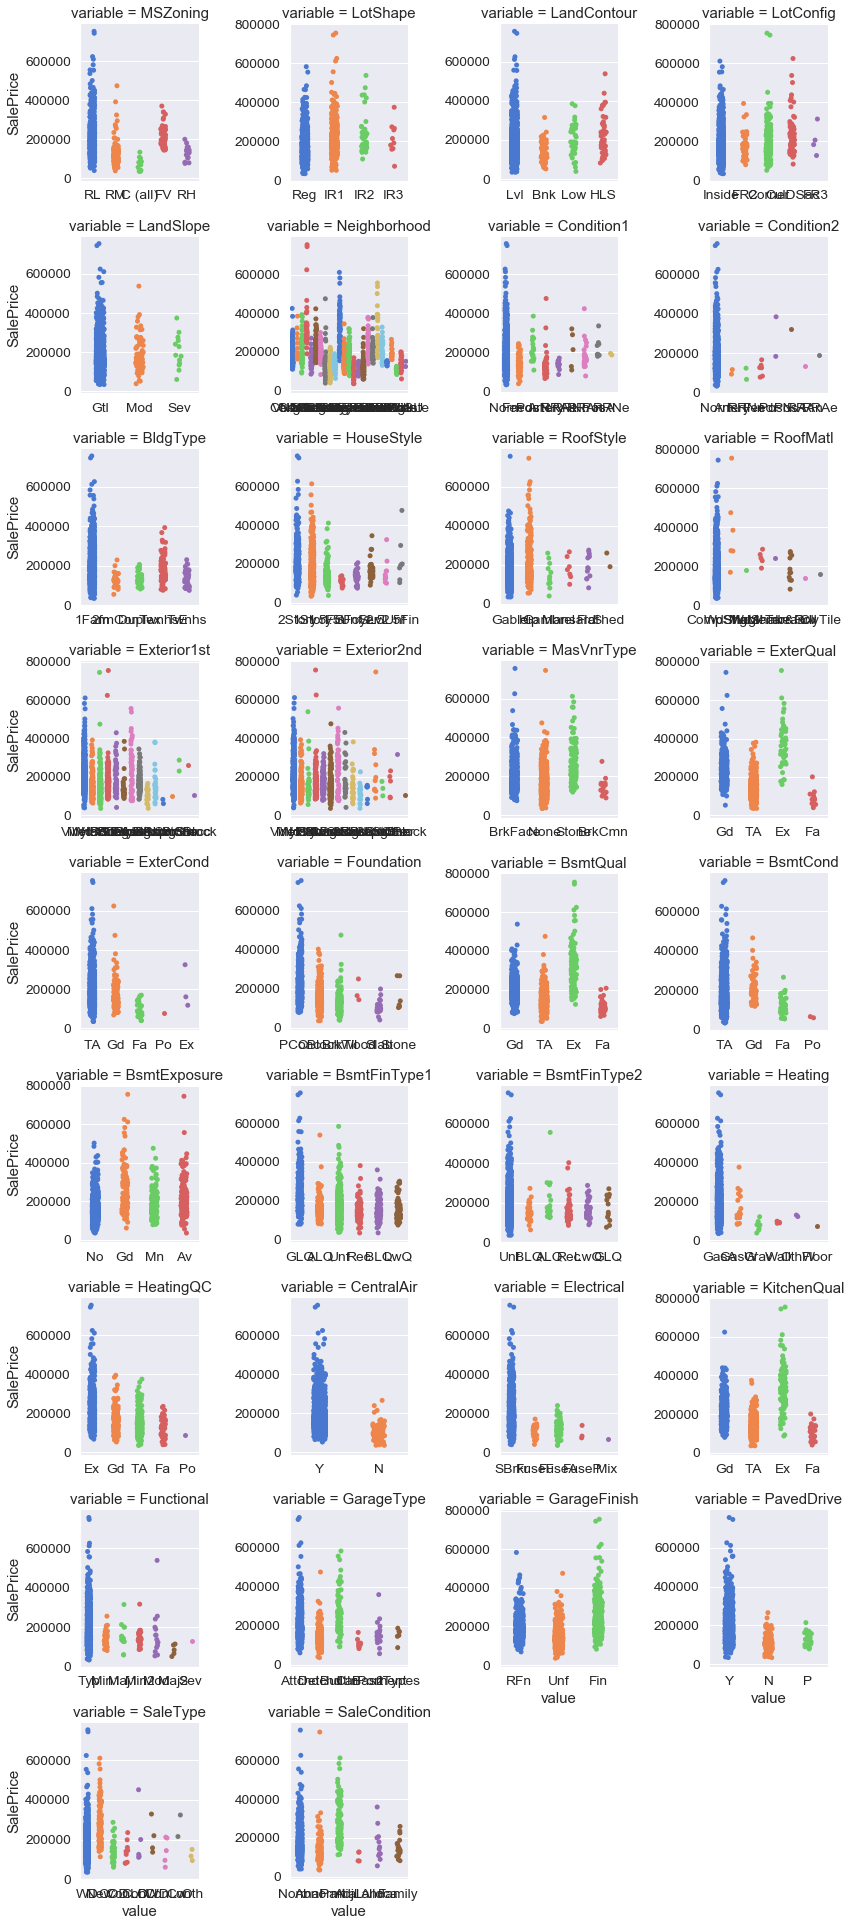

In [232]:
cat_melt = pd.melt(traindump, id_vars=['SalePrice'], value_vars=[f for f in qualitativeuseful])
g = sns.FacetGrid(cat_melt, col='variable', col_wrap=4, sharex=False, sharey=False)
g.map(sns.stripplot, 'value', 'SalePrice', jitter=True, palette="muted")

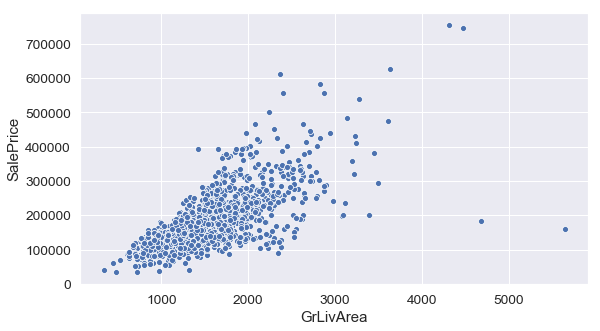

In [233]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(121)
sns.scatterplot(x = train.GrLivArea, y = train.SalePrice, ax = ax)

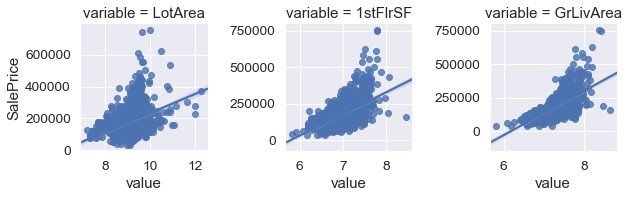

In [241]:
#these are successful when turned to log
log_features = ['LotArea', '1stFlrSF', 'GrLivArea']

for f in log_features:
    train[f] = np.log1p(train[f])
    test[f] = np.log1p(test[f])
    num_melt = pd.melt(train, id_vars=['SalePrice'],  value_vars = log_features)
g = sns.FacetGrid(data=num_melt, col="variable", sharex=False, sharey=False)
g.map(sns.regplot, 'value', 'SalePrice')

In [4]:
def encode(x,y): 
    if x == y:
        return 1
    else:
        return 0
def encode_has(x): 
    if x>0:
        return 1
    else:
        return 0

In [243]:
target = np.log(train.SalePrice)
categoricals = train.select_dtypes(exclude= [np.number])
numeric_features = train.select_dtypes(include = [np.number])
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending = False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageCond,81
GarageType,81
GarageYrBlt,81


In [244]:
categoricalst = test.select_dtypes(exclude= [np.number])
numeric_featurest = test.select_dtypes(include = [np.number])
nullst = pd.DataFrame(test.isnull().sum().sort_values(ascending = False)[:25])
nullst.columns = ['Null Count']
nullst.index.name = 'Feature'
nullst

,Null Count
Feature,
PoolQC,1456
MiscFeature,1408
Alley,1352
Fence,1169
FireplaceQu,730
LotFrontage,227
GarageCond,78
GarageQual,78
GarageYrBlt,78


In [5]:
#Feature engineering time



#categorical
train['MSSubClass'] = train['MSSubClass'].apply(str)
#year and month either should be trainsformed to sin/cos or turn categorical
train['YrSold'] = train['YrSold'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)

test['MSSubClass'] = test['MSSubClass'].apply(str)

#year and month either should be trainsformed to sin/cos or turn categorical
test['YrSold'] = test['YrSold'].astype(str)
test['MoSold'] = test['MoSold'].astype(str)

train.BsmtFinSF2 = train.BsmtFinSF2.apply(encode_has)
train.MasVnrArea = train.MasVnrArea.apply(encode_has)
train['2ndFlrSF'] = train['2ndFlrSF'].apply(encode_has)
train.LowQualFinSF = train.LowQualFinSF.apply(encode_has)
train.WoodDeckSF = train.WoodDeckSF.apply(encode_has)
train.OpenPorchSF = train.OpenPorchSF.apply(encode_has)
train.EnclosedPorch = train.EnclosedPorch.apply(encode_has)
train['3SsnPorch'] = train['3SsnPorch'].apply(encode_has)
train.ScreenPorch = train.ScreenPorch.apply(encode_has)
train.PoolArea = train.PoolArea.apply(encode_has)

test.BsmtFinSF2 = test.BsmtFinSF2.apply(encode_has)
test.MasVnrArea = test.MasVnrArea.apply(encode_has)
test['2ndFlrSF'] = test['2ndFlrSF'].apply(encode_has)
test.LowQualFinSF = test.LowQualFinSF.apply(encode_has)
test.WoodDeckSF = test.WoodDeckSF.apply(encode_has)
test.OpenPorchSF = test.OpenPorchSF.apply(encode_has)
test.EnclosedPorch = test.EnclosedPorch.apply(encode_has)
test['3SsnPorch'] = test['3SsnPorch'].apply(encode_has)
test.ScreenPorch = test.ScreenPorch.apply(encode_has)
test.PoolArea = test.PoolArea.apply(encode_has)


train.PoolQC.fillna('None', inplace = True)
train.MiscFeature.fillna('None', inplace = True)
train.Alley.fillna('Gravel', inplace = True)
train.Fence.fillna('MnPrv', inplace = True)
train.FireplaceQu.fillna('None', inplace = True)
train.LotFrontage.fillna(0, inplace = True)
test.PoolQC.fillna('None', inplace = True)
test.MiscFeature.fillna('None', inplace = True)
test.Alley.fillna('Gravel', inplace = True)
test.Fence.fillna('MnPrv', inplace = True)
test.FireplaceQu.fillna('None', inplace = True)
test.LotFrontage.fillna(0, inplace = True)

test.BsmtFinSF1.fillna(0.0 , inplace=True)
test.BsmtUnfSF.fillna(0.0 , inplace=True)
test.TotalBsmtSF.fillna(0.0 , inplace=True)
test.GarageCars.fillna(0.0 , inplace=True)
test.GarageArea.fillna(0.0 , inplace=True)
test.BsmtFullBath.fillna(0.0 , inplace=True)
#test.drop('BsmtHalfBath',axis = 1, inplace = True)
test.SaleType.fillna(test.SaleType.mode()[0], inplace=True)
test.Exterior1st.fillna(test.Exterior1st.mode()[0], inplace=True)
test.Exterior2nd.fillna(test.Exterior2nd.mode()[0], inplace=True)
test.KitchenQual.fillna(test.KitchenQual.mode()[0], inplace=True)
test.Utilities.fillna(test.Utilities.mode()[0], inplace=True)
test.Functional.fillna(test.Functional.mode()[0], inplace=True)
test.MSZoning.fillna(test.MSZoning.mode()[0], inplace=True)
test.MasVnrType.fillna(test.MasVnrType.mode()[0], inplace=True)
test.BsmtFinType2.fillna(test.BsmtFinType2.mode()[0], inplace=True)
test.BsmtFinType1.fillna(test.BsmtFinType1.mode()[0], inplace=True)
test.BsmtExposure.fillna(test.BsmtExposure.mode()[0], inplace=True)
test.BsmtQual.fillna(test.BsmtQual.mode()[0], inplace=True)
test.BsmtCond.fillna(test.BsmtCond.mode()[0], inplace=True)
test.GarageType.fillna(test.GarageType.mode()[0], inplace=True)
test.drop('GarageCond',axis = 1, inplace = True)
test.GarageFinish.fillna(test.GarageFinish.mode()[0], inplace=True)
test.drop('GarageQual',axis = 1, inplace = True)
test.GarageYrBlt.fillna(test.GarageYrBlt.median(), inplace = True)
test.drop('BsmtHalfBath',axis = 1, inplace = True)
test.drop('Electrical',axis = 1, inplace = True)

train.MasVnrType.fillna(train.MasVnrType.mode()[0], inplace=True)
train.Electrical.fillna(train.Electrical.mode()[0], inplace=True)
train.GarageYrBlt.fillna(train.GarageYrBlt.median(), inplace = True)
train.drop('BsmtHalfBath',axis = 1, inplace = True)
train.SaleType.fillna(train.SaleType.mode()[0], inplace=True)
train.GarageType.fillna(train.GarageType.mode()[0], inplace=True)
train.drop('GarageCond',axis = 1, inplace = True)
train.GarageFinish.fillna(train.GarageFinish.mode()[0], inplace=True)
train.drop('GarageQual',axis = 1, inplace = True)
train.BsmtFinType2.fillna(train.BsmtFinType2.mode()[0], inplace=True)
train.BsmtFinType1.fillna(train.BsmtFinType1.mode()[0], inplace=True)
train.BsmtExposure.fillna(train.BsmtExposure.mode()[0], inplace=True)
train.BsmtQual.fillna(train.BsmtQual.mode()[0], inplace=True)
train.BsmtCond.fillna(train.BsmtCond.mode()[0], inplace=True)

test.drop('MiscFeature',axis = 1, inplace = True)
test.drop('MiscVal',axis = 1, inplace = True)
train.drop('MiscFeature',axis = 1, inplace = True)
train.drop('MiscVal',axis = 1, inplace = True)


In [9]:
categoricals = pd.get_dummies(categoricals, drop_first= True)

In [10]:
categoricalst = pd.get_dummies(categoricalst, drop_first= True)

In [11]:
data = pd.concat([categoricals, numeric_features], axis=1, sort=False)
datat = pd.concat([categoricalst, numeric_featurest], axis=1, sort=False)
data.drop('Id',axis =1, inplace = True)
datat.drop('Id',axis =1, inplace = True)

dc = data.columns.tolist()
dtc = datat.columns.tolist()

diffcolz = list(set(dc) - set(dtc))
diffcolz

['RoofMatl_Membran',
 'Condition2_RRAe',
 'Exterior2nd_Other',
 'PoolQC_Fa',
 'SalePrice',
 'Electrical_Mix',
 'Utilities_NoSeWa',
 'Electrical_FuseP',
 'HouseStyle_2.5Fin',
 'Electrical_FuseF',
 'Condition2_RRNn',
 'Condition2_RRAn',
 'Heating_GasA',
 'Electrical_SBrkr',
 'RoofMatl_Roll',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'RoofMatl_Metal',
 'Heating_OthW',
 'RoofMatl_CompShg']

In [12]:
diffcolz2 = list(set(dtc) - set(dc))
diffcolz2

['MSSubClass_150']

In [13]:
for i in diffcolz:
    data.drop(i, axis =1, inplace = True)
for i2 in diffcolz2:
    datat.drop(i2, axis =1, inplace = True)
data.to_csv('traindf.csv')
datat.to_csv('testdf.csv')

In [248]:
frames = [data,datat]
totaldf = pd.concat(frames)

In [14]:
y = np.log(train.SalePrice)
#dropping the target variable and the index from the training set
X = data

In [191]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .29)

In [260]:
#Linear regression 

lr = linear_model.LinearRegression()
lr_model = lr.fit(X_train, y_train)
preds_lr = lr_model.predict(X_test)
preds_lr = pd.Series(data = preds_lr, index = y_test.index)


#some outliers were detected
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

preds_lr = preds_lr.replace(-567012046.9369663,np.log(train.SalePrice).mean())
preds_lr = preds_lr.replace(-567012046.8640039,np.log(train.SalePrice).mean())
preds_lr = preds_lr.replace(-567012046.4983693,np.log(train.SalePrice).mean())
preds_lr = preds_lr.replace(559680.4770570993,np.log(train.SalePrice).mean())
preds_lr = preds_lr.replace(922818.2797750235,np.log(train.SalePrice).mean())

np.sqrt(mean_squared_error(y_test, preds_lr))

0.146902312048566

In [256]:
#ridge
alpha = 0.01
rm = linear_model.Ridge(alpha = alpha)
ridge_model = rm.fit(X_train, y_train)
preds_ridge = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, preds_ridge))

0.13901629296415166

In [94]:
#GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators= 1000, max_depth= 2, learning_rate= .01)
gbr.fit(X_train, y_train)
preds_gbr = gbr.predict(X_test)
#est_train = mean_squared_error(y_test, pred)
print("rmse  "+ str(np.sqrt(mean_squared_error(y_test, preds_gbr))))
#print('Mean square error on the Train set is: {}'.format(est_train))
est_test = mean_squared_error(y_test, preds_gbr)
#print('Mean square error on the Test set is: {}'.format(est_test))
print('R square is: {}'.format(gbr.score(X_test, y_test)))

rmse  0.13194258455681684
R square is: 0.8965805007844208


In [154]:
import xgboost as xgb
#xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
#                max_depth = 5, alpha = 10, n_estimators = 10)
#xg_reg.fit(X_train,y_train)

#preds = xg_reg.predict(X_test)
gbm = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.1).fit(X_train, y_train)
preds_gbm = gbm.predict(X_test)
#rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % np.sqrt((mean_squared_error(y_test, preds_gbm))))
print('R square is: {}'.format(gbm.score(X_test, y_test)))

KeyboardInterrupt: 

In [96]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)
preds_rf = rf.predict(X_test)
# Calculate the absolute errors
rmse = np.sqrt(mean_squared_error(y_test, preds_rf))
print("RMSE: %f" % (rmse))
print('R square is: {}'.format(rf.score(X_test, y_test)))

RMSE: 0.134883
R square is: 0.8919200623534957


In [97]:
from sklearn.linear_model import ElasticNet
el = ElasticNet()
el.fit(X_train, y_train)
preds = el.predict(X_test)
# Calculate the absolute errors
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))
print('R square is: {}'.format(el.score(X_test, y_test)))

RMSE: 0.236463
R square is: 0.6678322007400748


In [250]:
#stacking
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
import xgboost as xgb
from sklearn.linear_model import Lasso
from mlens.metrics.metrics import rmse 

ensemble = SuperLearner()

In [192]:
from vecstack import stacking
models = [
    rm,
        
    gbr,
        
    RandomForestRegressor()
]

S_train, S_test = stacking(models,                   
                           X_train, y_train, X_test,   
                           regression=True, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=rmse, 
    
                           n_folds=4, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

In [194]:
model = linear_model.Ridge()
model = model.fit(S_train, y_train)
preds_ens = model.predict(S_test)
print('RMSE: [%.8f]' % rmse(y_test, preds_ens))

RMSE: [0.11974153]


In [210]:
model = linear_model.Ridge()
model = model.fit(data, np.log(train.SalePrice))
preds_ens1 = model.predict(datat)
preds_ens1 = pd.Series(np.exp(preds_ens1), index = test['Id'])
preds_ens1.to_csv('predictions-lr.csv')

C:\Users\Ghh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """


In [254]:
model2 = ExtraTreesRegressor()
model2 = model2.fit(data, np.log(train.SalePrice))
preds_ens2 = model2.predict(datat)
preds_ens2 = pd.Series(np.exp(preds_ens2), index = test['Id'])
preds_ens2.to_csv('predictions-etr.csv', index='Id')

C:\Users\Ghh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ghh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """


In [255]:
model3 = gbr
model3 = model3.fit(data, np.log(train.SalePrice))
preds_ens3 = model3.predict(datat)
preds_ens3 = pd.Series(np.exp(preds_ens3), index = test['Id'])
preds_ens3.to_csv('predictions-gbr.csv', index='Id')

C:\Users\Ghh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """
